In [380]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [381]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('BIDV_BID.csv', index_col='Date')

In [382]:
# Hàm xử lý dữ liệu đầu vào
def preprocess_data(data):
    # Xử lý giá trị thiếu (nếu có)
    data = np.nan_to_num(data)
    
    # Chuẩn hóa dữ liệu
    data = (data - np.mean(data)) / np.std(data)
    
    return data

In [383]:
# Lấy cột Close làm dữ liệu time series
time_series = data['Close']

In [384]:
time_series

Date
3/1/2017      11235.8
4/1/2017      11458.3
5/1/2017      11421.2
6/1/2017      11680.8
9/1/2017      12014.5
               ...   
26/05/2023    43400.0
29/05/2023    43900.0
30/05/2023    43800.0
31/05/2023    44000.0
1/6/2023      43700.0
Name: Close, Length: 1599, dtype: float64

In [385]:
time_series = preprocess_data(time_series)

In [386]:
time_series

array([-2.08351896, -2.05837565, -2.06256808, ...,  1.596355  ,
        1.61895573,  1.58505463])

In [387]:

# Hàm triển khai SSA
def ssa_decomposition(data, window_length):
    # Tạo ma trận hankel
    L = window_length
    T = len(data)
    K = T - L + 1
    X = np.zeros((L, K))
    for i in range(K):
        X[:, i] = data[i:i+L]

    # SVD của ma trận XXT
    XXT = np.dot(X, X.T)
    eigenvalues, eigenvectors = np.linalg.eig(XXT)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Sắp xếp các eigenvector theo eigenvalue giảm dần
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Lựa chọn số lượng eigenvector
    # Ở đây, chúng ta chọn số lượng eigenvector lớn nhất để tái tạo chuỗi gốc
    num_components = min(L, K)
    selected_eigenvectors = eigenvectors[:, :num_components]

    # Tạo ma trận tái tạo X~
    X_tilde = np.dot(np.dot(selected_eigenvectors, selected_eigenvectors.T), X)

    # Tính chuỗi một chiều bằng cách lấy trung bình theo đường chéo của ma trận X~
    reconstructed_series = np.mean(X_tilde, axis=0)
    

    return reconstructed_series

In [388]:
reconstructed_series = ssa_decomposition(time_series, window_length=20)
n = time_series.shape[0]
m = reconstructed_series.shape[0]
time_series = time_series[n-m:]

In [389]:
print("time_series: \n", time_series)
print("reconstructed_series: \n", reconstructed_series)

time_series: 
 [-1.91170819 -1.92009306 -1.92846663 ...  1.596355    1.61895573
  1.58505463]
reconstructed_series: 
 [-1.97917646 -1.97100517 -1.96450972 ...  1.65200931  1.6548344
  1.65455189]


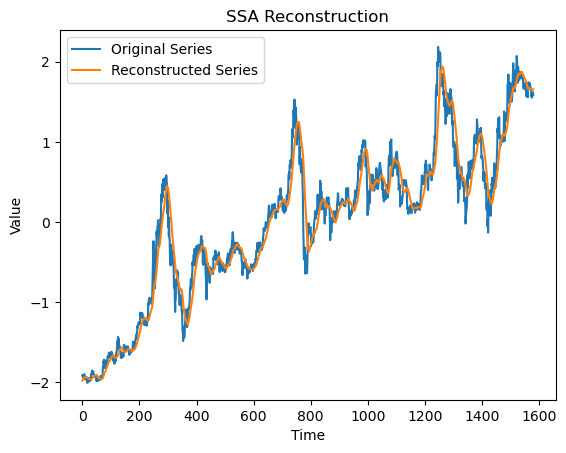

In [390]:
# Vẽ đồ thị so sánh chuỗi gốc và chuỗi tái tạo
plt.plot(time_series, label='Original Series')
plt.plot(reconstructed_series, label='Reconstructed Series')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SSA Reconstruction')
plt.show()

In [391]:
def rmse(y_true, y_pred):
    return math.sqrt(np.square(np.subtract(y_true,y_pred)).mean())

In [392]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 


In [393]:
# Tính toán MAPE
mape_score = mean_absolute_percentage_error(time_series, reconstructed_series)

print("MAPE:", mape_score)

MAPE: 0.6851232051786448


In [394]:
# Tính toán RMSE
rmse_score = rmse(time_series, reconstructed_series)

print("RMSE:", rmse_score)

RMSE: 0.21170365810372951
